In [4]:
#import the needed python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#import dataset and see the dataframe structure
df = pd.read_csv('nobel.csv')
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


Analyze Nobel Prize winner data and identify patterns by answering the following questions: 
Question 1: What is the most commonly awarded gender and birth countr?

Store your answers as string variables top_gender and top_country.

In [8]:
#To find the most awarded gender, I will get the value counts on the respective columns and select the first on the list by index. This way, 
# I get to save my answers as series in a new variable.

top_gender = df['sex'].value_counts().index[0]
top_birth_country = df['birth_country'].value_counts().index[0]

print('\n The most commonly awarded gender is' + ' ' + top_gender)
print('\n The most commonly awarded country is' + ' ' + top_birth_country)


 The most commonly awarded gender is Male

 The most commonly awarded country is United States of America


Question 2: Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Store this as an integer called max_decade_usa.



In [16]:
#To answer the above question, I'll first create a column for USA born winners, i'll create another column called decade to categorize years into their
# Respective decades. I'll go further to calculate the average proportion of USA born winners in each decade, then i'll use the average proportion dataframe to filter the 
# maximum proportion in decades column and get the first value.

df['usa_born'] = df['birth_country'] == 'United States of America'
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)
avg_proport = df.groupby('decade', as_index = False)['usa_born'].mean()
max_proportn = avg_proport[avg_proport['usa_born'] == avg_proport['usa_born'].max()]['decade'].values[0]

print(max_proportn)

2000


Text(0.5, 1.0, 'Proportion of USA born winners by decades')

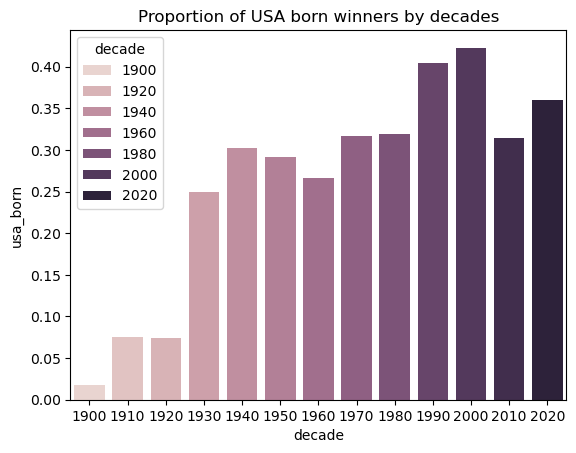

In [18]:
# Here is a visualization of the highest proportion of USA winners by decades

sns.barplot(x='decade', y='usa_born', data = avg_proport, hue = 'decade')
plt.title('Proportion of USA born winners by decades')

Question 3: Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.

In [26]:
#To answer the above question, I'll create a column for female winners, i'll calculate the average proportion of female winners and group by decade and category
# i'll continue by calculating the highest proportion of female winners, and then storing the first values for decade and category in the required variable as key pair values in dictionary

df['female_winners'] = df['sex'] == 'Female'
fem_winners_prop = df.groupby(['decade', 'category'], as_index = False)['female_winners'].mean()
max_femwinn_prop = fem_winners_prop[fem_winners_prop['female_winners'] == fem_winners_prop['female_winners'].max()][['decade', 'category']]
max_female_dict = {max_femwinn_prop['decade'].values[0] : max_femwinn_prop['category'].values[0]}

print(max_female_dict)

{2020: 'Literature'}


Text(0.5, 1.0, 'Female winners by categories and decade')

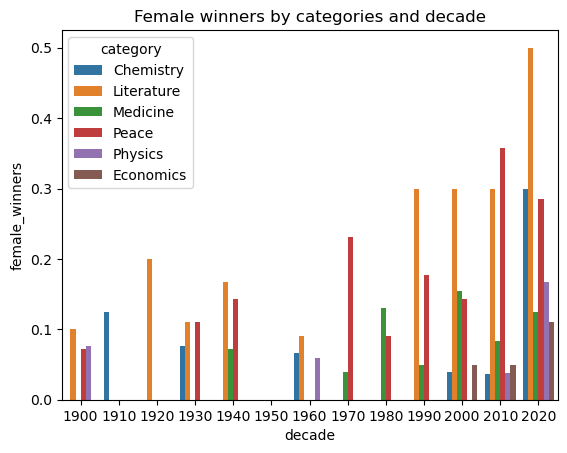

In [32]:
# Below is the visualization for the decade with the highest female winners by category

sns.barplot(x = 'decade', y = 'female_winners', data = fem_winners_prop, hue = 'category')
plt.title('Female winners by categories and decade')

Question 4: Who was the first woman to receive a Nobel Prize, and in what category?

Save your string answers as first_woman_name and first_woman_category.



In [50]:
# To answer the above question,i'll select the female_winners column from df, i'll carry out conditional filtering on the year column to find the earliest date,
# and from there i'll get the first woman and first category

first_woman_np = df[df['female_winners']]

first_woman_year = first_woman_np[first_woman_np['year'] == first_woman_np['year'].min()]

first_woman_name = first_woman_np['full_name'].values[0]
first_woman_category = first_woman_year['category'].values[0]

print('\n The first woman to recieve a Nobel Price is :' + first_woman_name)
print('\n The category is :' + first_woman_category)



 The first woman to recieve a Nobel Price is :Marie Curie, née Sklodowska

 The category is :Physics


Question 5: Which individuals or organizations have won more than one Nobel Prize throughout the years?

Store the full names in a list named repeat_list.

In [58]:
# To answer the above question i'll first subset the dataframe to get the full_name column and count each names, 
# then i'll create a variable to count any name frequency greater or equal to 2, and lastly, i'll save it as a list

wins = df['full_name'].value_counts()
count_wins = wins[wins >= 2].index
repeat_list = list(count_wins)

print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


Contact Me: deborahokorohdavid@gmail.com